# **Multi-Variate Linear Regression**

# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [2]:
df=pd.read_csv("/content/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Drop unnecessary columns

In [9]:
data = df.drop(columns=['date','street', 'city', 'statezip', 'country'])

# Define features (X) and target (y)

In [10]:
X = data.drop(columns=['price'])
y = data['price']

# Splitting the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(3680, 920, 3680, 920)

# Initializing and training the linear regression model

In [12]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Making predictions on the test set

In [13]:
y_pred = model.predict(X_test)

# Calculating accuracy of the model

In [18]:
model.score(X_test,y_test)

0.032283856632729035

# Calculating MSE

In [20]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 986921767056.0989


# Calculation R^2 Score

In [19]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.032283856632729035


# Display the coefficients and intercept

In [16]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)
print("\nIntercept:", model.intercept_)


Coefficients:
          Feature    Coefficient
0        bedrooms  -64497.461587
1       bathrooms   36520.440675
2     sqft_living     186.049845
3        sqft_lot      -0.514414
4          floors   69824.740107
5      waterfront  382459.666353
6            view   44755.841775
7       condition   29335.539391
8      sqft_above      96.860817
9   sqft_basement      89.189028
10       yr_built   -2569.163533
11   yr_renovated       8.259917

Intercept: 4925638.066179765


# Plotting the outcomes

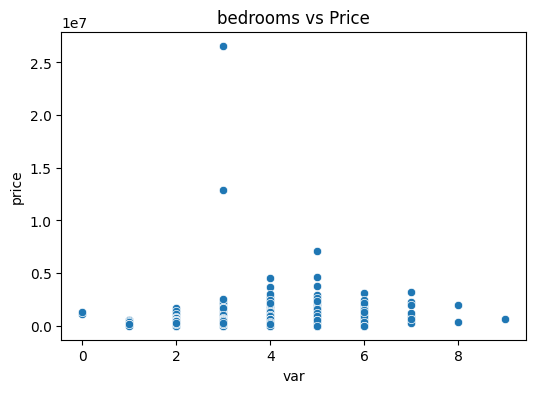

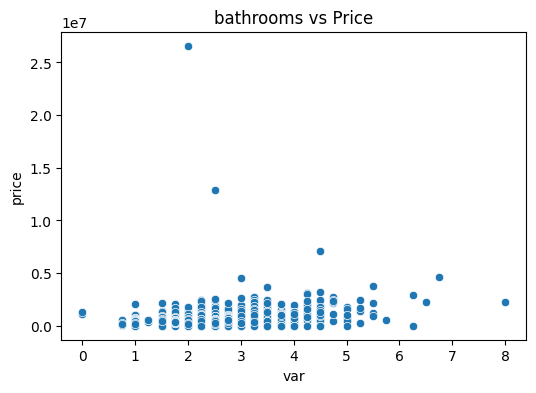

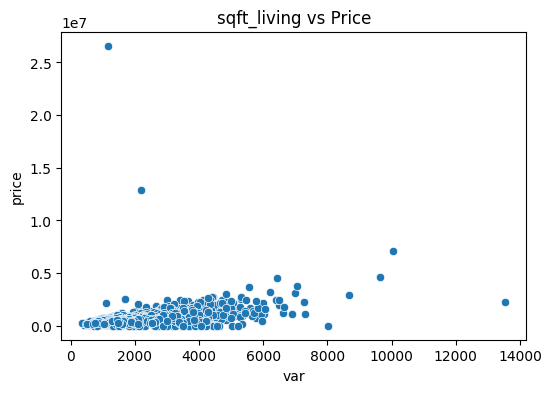

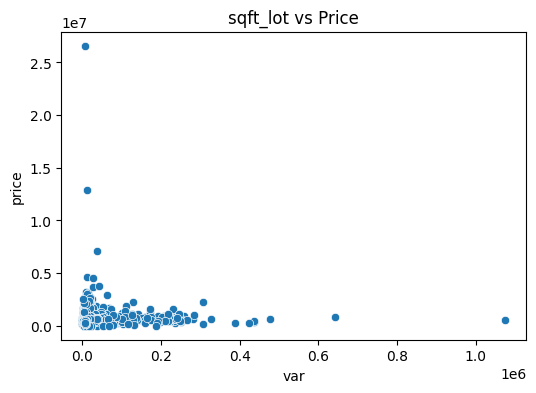

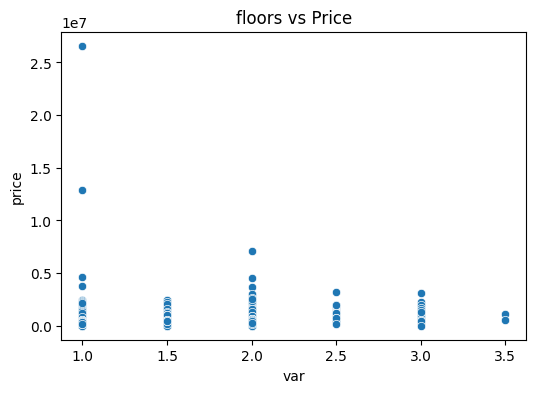

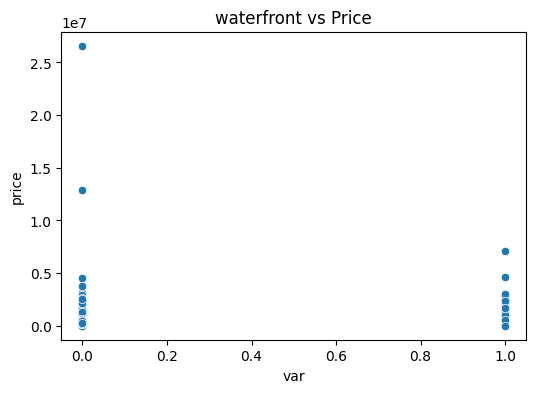

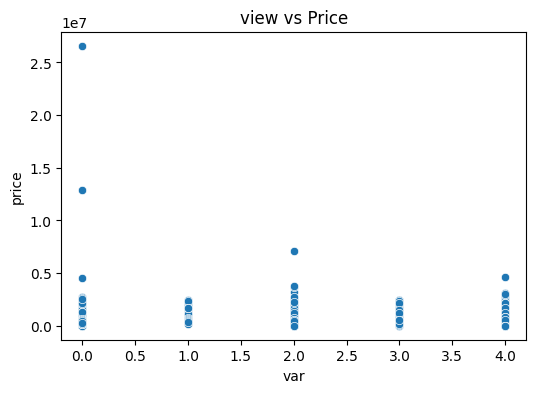

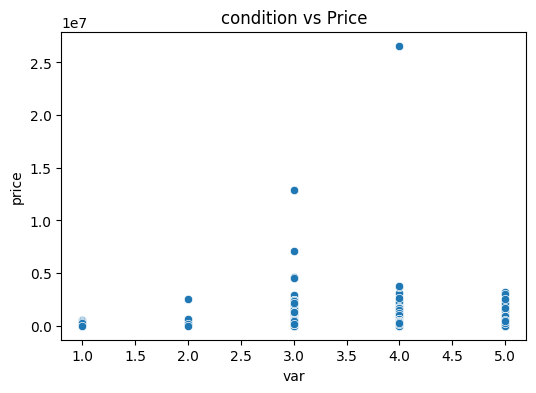

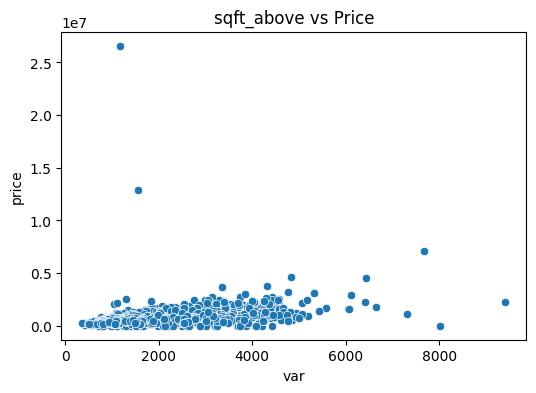

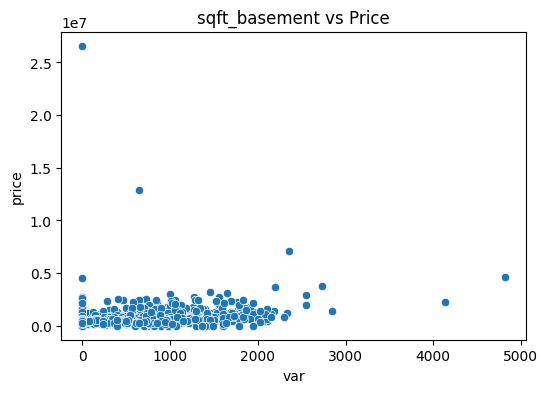

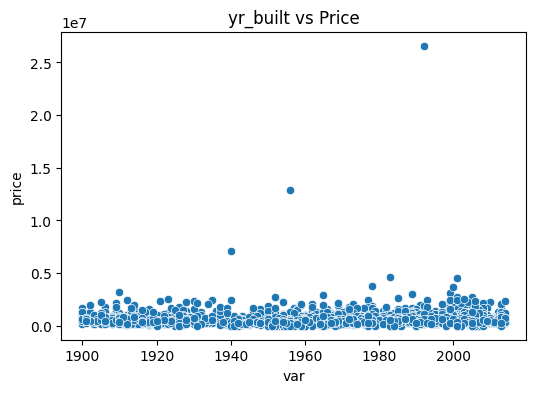

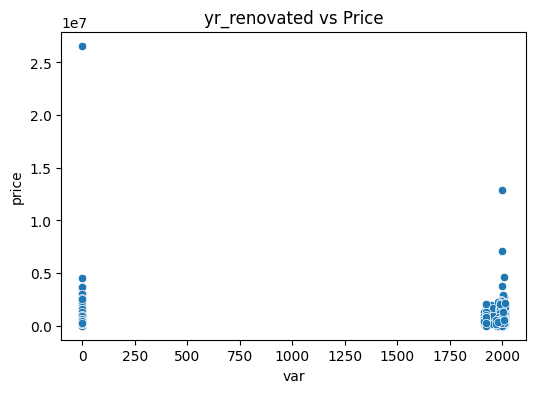

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
indepent_var=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']
for var in indepent_var:
  plt.figure(figsize=(6,4))
  sns.scatterplot(x=var,y='price',data=data)
  plt.xlabel('var')
  plt.ylabel('price')
  plt.title(f'{var} vs Price')
  plt.show()